# Основы: обучение первой модели

Добро пожаловать в CoLab, где мы будем тренировать нашу первую модель машинного обучения!

Мы постараемся сохранять простоту преподносимого материала и ввести только базовые понятия необходимые для работы. Последующие CoLabs будут содержать более продвинутые техники.

Задача, которую мы будем решать - преобразование градусов Цельсия в градусы Фаренгейта. Формула преобразования выглядит следующим образом:

$$ f = c \times 1.8 + 32 $$

Безусловно, было бы проще просто написать функцию конвертации на Python или любом другом языке программирования, которая бы выполняла непосредственные вычисления, но в таком случае это не было бы машинным обучением :)

Вместо этого мы подадим на вход TensorFlow имеющиеся у нас входные значения градусов Цельсия (0, 8, 15, 22, 38) и их соответствующие градусы по Фаренгейту (32, 46, 59, 72, 100). Затем мы натренируем модель таким образом, чтобы та примерно соответствовала приведённой выше формуле.

# Импорт зависимостей

Первым делом импортируем TensorFlow. Здесь и в последующем мы сокращённо называем его `tf`. Мы так же настраиваем уровень логгирования - только ошибки.

Далее, импортируем `NumPy` как `np`. Numpy помогает нам представить наши данные в виде высокоэффективных списков.

In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf


import numpy as np

# Подготовим данные для тренировки

Как мы уже видели ранее, методика машинного обучения с учителем основывается на поиске алгоритма преобразования входных данных в выходные. Так как задачей этого CoLab является создание модели, которая может выдать результат преобразования градусов по Фаренгейту в градусы Цельсия, создадим два списка - `celsius_q` и `fahrenheit_a`, которые мы используем при обучении нашей модели.

In [41]:
celsius_q    = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} градусов Цельсия = {} градусов Фаренгейта".format(c, fahrenheit_a[i]))

-40.0 градусов Цельсия = -40.0 градусов Фаренгейта
-10.0 градусов Цельсия = 14.0 градусов Фаренгейта
0.0 градусов Цельсия = 32.0 градусов Фаренгейта
8.0 градусов Цельсия = 46.0 градусов Фаренгейта
15.0 градусов Цельсия = 59.0 градусов Фаренгейта
22.0 градусов Цельсия = 72.0 градусов Фаренгейта
38.0 градусов Цельсия = 100.0 градусов Фаренгейта


**Некоторая терминология машинного обучения**



*   **Свойство (признак)** - входное(ые) значение нашей модели. В данном случае единичное значение - градусы Цельсия.
* **Метки** - выходные значения, которые наша модель предсказывает. В данном случае единичное значение - градусы Фаренгейта.
* **Пример** - пара входных-выходных значений используемых для тренировки. В данном случае это пара значений из `celsius_q` и `fahrenheit_a` под определённым индексом, например, `(22,72)`.



# Создаём модель

Далее мы создаём модель. Мы будем использовать максимально упрощенную модель - модель плотной сети (`Dense`-сеть).
Так как задача достаточно незамысловата, то и сеть будет состоять из единственного слоя с единственным нейроном.

**Строим сеть**

Мы назовём слой `l0` (**l**ayer и ноль) и создадим его, инициализировав `tf.keras.layers.Dense` со следующими параметрами:

* `input_shape=[1]` - этот параметр определяет размерность входного параметра - единичное значение. Массив размером $ 1 \times 1 $ с единственным значением. Так как это первый (и единственный) слой, то и размерность входных данных соответствует размерности всей модели. Единственное значение - значение с плавающей запятой, представляющее градусы Цельсия.

* `units=1` - этот параметр определяет количество нейронов в слое. Количество нейронов определяет то, как много внутренних переменных слоя будет использовано для обучения при поиске решения поставленной задачи. Так как это последний слой, то его размерность равна размерности результата - выходного значения модели - единственного числа с плавающей запятой представляющего собой градусы Фаренгейта. (В многослойной сети размеры и форма слоя `input_shape` должны соответствовать размерам и формам следующего слоя).

In [42]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Преобразуем слои в модель

Как только слои определены их необходимо преобразовать в модель. `Sequential`-модель принимает в качестве аргументов перечень слоёв в том порядке в котором их необходимо применять - от входного значения до выходного значения.

У нашей модели всего один слой - `l0`.

In [43]:
model = tf.keras.Sequential([l0])

## Компилируем модель с функцией потерь и оптимизаций

Перед тренировкой модель должна быть скомпилирована (собрана). При компиляции для тренировки необходимы:

* **функция потерь** - способ измерения того, насколько далеко предсказываемое значение от желаемого выходного значения (измеримая разница называется "потерей").

* **функция оптимизации** - способ корректировки внутренних переменных для уменьшения потерь.

In [44]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Функция потерь и функция оптимизации используются во время тренировки модели (`model.fit(...)` упоминаемая ниже) для выполнения первичных вычислений в каждой точке и последующей оптимизации значений.

Действие вычисления текущих потерь и последующее улучшение этих значений в модели - это именно то, чем является тренировка.

Во время тренировки, функция оптимизации используется для подсчета корректировок значений внутренних переменных. Цель - подогнать значения внутренних переменных таким образом в модели (а это, по сути, математическая функция), чтобы те отражали непосредственное выражение конвертации градусов Цельсия в градусы Фаренгейта.

TensorFlow использует численный анализ для выполнения подобного рода операций оптимизации и вся эта сложность скрыта от ваших глаз, поэтому мы не будем вдаваться в детали в этом курсе.

Что полезно знать об этих параметрах:

Функция потерь ([среднеквадратичная ошибка](https://www.yandex.ru/search/?text=%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D0%B0%D1%8F%20%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B0&lr=192&clid=2186621)) и функция оптимизации ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)), используемые в этом примере, являются стандартными для подобных простых моделей, но кроме них доступно множество других. На данном этапе нам не важно каким образом работают эти функции.

На что стоит обратить внимание, так это на функцию оптимизации и параметр - коэффициент скорости обучения (learning rate), который в нашем примере равен `0.1`. Это используемый размер шага при корректировке внутренних значений переменных. Если значение слишком маленькое - понадобится слишком много обучающих итераций для обучения модели. Слишком большое - точность падает. Нахождение хорошего значения коэффициента скорости обучения требует некоторых проб и ошибок, оно обычно находится в интервале от `0.01` (по-умолчанию) до `0.1`.

### Тренируем модель

Тренировка модели осуществляется методом `fit`.

Во время тренировки модель получает на вход значения градусов Цельсия, выполняет преобразования используя значения внутренних переменных (называемые "весами") и возвращает значения, которые должны соответствовать градусами по Фаренгейту. Так как первоначальные значения весов установлены произвольными, то и результатирующие значения будут далеки от корректных значений. Разница между необходимым результатом и фактическим вычисляется с использованием функции потерь, а функция оптимизации определяет каким образом должны быть подкорректированы веса.

Этот цикл вычислений, сравнений и корректировки контролируется внутри метода `fit`. Первый аргумент - входные значения, второй аргумент - желаемые выходные значения. Аргумент `epochs` определяет какое количество раз этот обучающий цикл должен быть выполнен. Аргумент `verbose` контролирует уровень логгирования.

In [45]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Завершили тренировку модели")

Завершили тренировку модели


### Отображаем статистику тренировок

Метод `fit` возвращает объект, который содержит информацию об изменении потерь с каждой последующей итерацией. Мы можем воспользоваться этим объектом для построения соответствующего графика потерь. Высокая потеря означает, что значение градусов Фаренгейта, которые предсказала модель, далеки от истинных значений в массиве `fahrenheit_a`.

Для визуализации воспользуемся `Matplotlib`. Как вы можете увидеть, наша модель улучшается очень быстро в самом начале, а затем приходит к стабильному и медленному улучшению до тех пор, пока результаты не становятся "около"-идеальными в самом конце обучения.

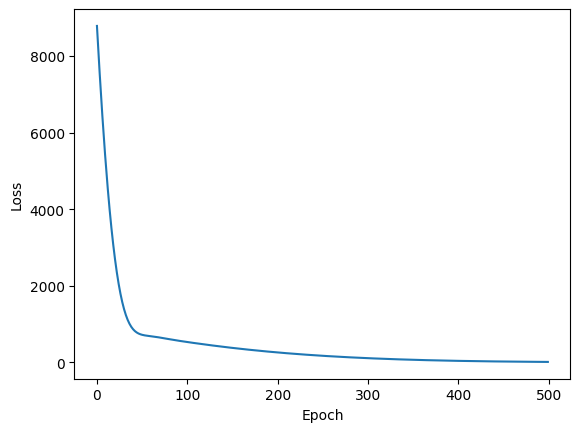

In [46]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

### Используем модель для предсказаний

Теперь у нас есть модель, которая была обучена на входных значениях `celsius_q` и выходных значениях `fahrenheit_a` для определения взаимосвязи между ними. Мы можем воспользоваться методом предсказания для вычисления тех значений градусов Фаренгейта по которым ранее нам неизвестны были соответствующие градусы Цельсия.

Например, сколько будет `100.0` градусов Цельсия по Фаренгейту? Попробуйте угадать перед тем как запускать код ниже.

In [47]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 70ms/step
[[211.27188]]


Правильный ответ $100 \times 1.8 + 32 = 212$, так что наша модель справилась достаточно хорошо!

### Ревью

* Мы создали модель с использованием Dense-слоя
* Мы обучили её на 3500 примерах (7 пар значений, 500 обучающих итераций)

Наша модель подогнала значения внутренних переменных (весов) в Dense-слое таким образом, чтобы возвращать правильные значения градусов Фаренгейта на произвольное входное значение градусов Цельсия.

## Смотрим на веса в слое

Давайте отобразим значения внутренних переменных Dense-слоя.

In [48]:
print("Это значения переменных слоя: {}".format(l0.get_weights()))

Это значения переменных слоя: [array([[1.8297689]], dtype=float32), array([28.295004], dtype=float32)]


Значение первой переменной близко к ~1.8 , а второй к ~32. Эти значения (1.8 и 32) являются непосредственными значениями в  формуле конвертации градусов Цельсия в градусы Фаренгейта.

Это действительно очень близко к фактическим значениям в формуле! Мы рассмотрим этот момент подробнее в последующих видео, где мы покажем, каким образом работает Dense-слой, а пока стоит знать лишь то, что один нейрон с единственным входом и выходом, содержит в себе простую математику - `y = mx + b` (уравнение прямой), которая представляет собой не что иное, как нашу с вами формулу преобразования градусов Цельсия в градусы Фаренгейта, `f = 1.8c + 32`.

Так как представления одинаковые, то и значения внутренних переменных модели должны были сойтись к тем, которые представлены в фактической формуле, что и произошло в итоге.

При наличие дополнительных нейронов, дополнительных входных значений и выходных значений, формула становится немного сложнее, но суть остаётся той же.

### Немного экспериментов

Ради веселья! Что будет, если мы создадим больше Dense-слоёв с большим количеством нейронов, которые, в свою очередь, будут содержать больше внутренних переменных?

In [49]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Закончили обучение модели")
print(model.predict([100.0]))
print("Модель предсказала, что 100 градусов Цельсия соответствуют {} градусам Фаренгейта".format(model.predict([100.0])))
print("Значения внутренних переменных слоя l0: {}".format(l0.get_weights()))
print("Значения внутренних переменных слоя l1: {}".format(l1.get_weights()))
print("Значения внутренних переменных слоя l2: {}".format(l2.get_weights()))

Закончили обучение модели
1/1 [==============================] - 0s 78ms/step
[[211.74742]]
1/1 [==============================] - 0s 40ms/step
Модель предсказала, что 100 градусов Цельсия соответствуют [[211.74742]] градусам Фаренгейта
Значения внутренних переменных слоя l0: [array([[-0.72914284,  0.06573275, -0.03936328,  0.7294816 ]],
      dtype=float32), array([-3.4092996, -2.778593 , -3.4129717,  3.5912585], dtype=float32)]
Значения внутренних переменных слоя l1: [array([[ 0.76554924, -0.22016776,  0.7340072 ,  0.49651814],
       [-0.29751214, -0.14007226, -0.17226948,  0.9948344 ],
       [ 0.16791889,  0.48270783,  0.62501764,  1.4176875 ],
       [ 0.41750163,  0.4689142 , -0.9002534 , -0.69332933]],
      dtype=float32), array([ 3.057391 , -2.5057836, -3.2632987, -3.5610902], dtype=float32)]
Значения внутренних переменных слоя l2: [array([[ 0.3329633 ],
       [-0.24360536],
       [-0.7421882 ],
       [-1.2763551 ]], dtype=float32), array([3.40163], dtype=float32)]


Как вы могли уже заметить, текущая модель тоже способна достаточно хорошо предсказывать соответствующие значения градусов Фаренгейта. Однако, если взглянуть на значения внутренних переменных (веса) нейронов по слоям, то никаких значений похожих на `1.8` и `32` мы уже не увидим. Добавленная  сложность модели скрывает "простую" форму преобразования градусов Цельсия в градусы Фаренгейта.